# Deteksi Jenis Sapi Berdasarkan Warna dan Corak

In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil
import os
import pandas as pd
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb
from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

cv2: Pustaka OpenCV untuk tugas visi komputer.

numpy as np: Pustaka NumPy untuk komputasi numerik dengan array dan matriks.

pandas as pd: pandas library untuk manipulasi dan analisis data.

matplotlib.pyplot as plt: Matplotlib library untuk membuat visualisasi.

math.ceil: fungsi ceil dari modul matematika untuk mengumpulkan nilai.

os: Fungsionalitas yang bergantung pada sistem operasi untuk berinteraksi dengan sistem file.

mpl_toolkits.mplot3d.Axes3D: Modul untuk membuat plot 3D di Matplotlib.

matplotlib.colors: Modul untuk bekerja dengan warna di Matplotlib.

matplotlib.colors.hsv_to_rgb : Berfungsi untuk mengubah warna dari format HSV ke RGB.

tqdm: Perpustakaan untuk membuat bilah kemajuan.

sklearn.metrics.accuracy_score: Berfungsi untuk menghitung skor akurasi untuk klasifikasi.

sklearn.metrics.classification_report: Berfungsi untuk membuat laporan klasifikasi.

sklearn.model_selection.train_test_split: Fungsi untuk membagi data menjadi set pelatihan dan pengujian.

sklearn.ensemble.RandomForestClassifier: Implementasi pengklasifikasi Hutan Acak dari scikit-learn.

In [3]:
folders = [
    "data\Ayrshire_cattle",
    "data\Brown_Swiss_cattle",
    "data\Holstein_Friesian_cattle",
]
data = []
file_name = []

for folder in folders:
    dataset = os.listdir(folder)
    for file in dataset:
        img_path = os.path.join(folder, file)
        name = os.path.splitext(file)[0]
        temp = cv2.imread(img_path)
        rgb_data = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
        data.append(rgb_data)
        file_name.append(name)

Mendefinisikan daftar yang disebut folder yang berisi tiga jalur folder, masing-masing mewakili jenis sapi yang berbeda.
Dua daftar kosong yaitu data dan file_name kemudian diinisialisasi. Daftar ini akan digunakan untuk menyimpan data gambar yang diproses dan nama file yang sesuai.
Setelah itu melakukan perulangan pada setiap jalur folder dalam daftar folder.
Untuk setiap folder, ia menggunakan os.listdir(folder) untuk mendapatkan daftar file yang ada di folder itu.
Loop lain mulai mengulang setiap file dalam daftar dataset.
Di dalam loop dalam, os.path.join(folder, file) digunakan untuk membuat jalur lengkap dari file gambar dengan menggabungkan jalur folder dan nama file.
Variabel name menyimpan nama file tanpa ekstensi file dengan menggunakan os.path.splitext(file)[0].
cv2.imread(img_path) membaca gambar dari img_path dan menyimpannya dalam variabel temp sebagai larik NumPy.
Ruang warna gambar diubah dari BGR ke RGB menggunakan cv2.cvtColor(temp, cv2.COLOR_BGR2RGB), dan hasilnya ditetapkan ke variabel rgb_data.
rgb_data ditambahkan ke daftar data, dan nama ditambahkan ke daftar file_name.
Setelah memproses semua file di folder saat ini, loop luar berpindah ke folder berikutnya di daftar folder, mengulangi prosesnya.
Setelah semua folder dan file diproses, daftar data akan berisi data gambar RGB untuk setiap gambar, dan daftar nama_file akan berisi nama file yang sesuai tanpa ekstensi.

In [4]:
def process_dataset(dataset_dir):
    data = [] 
    labels = []
    paths = []
    
    for sub_folder in os.listdir(dataset_dir):
        sub_folder_files = os.listdir(os.path.join(dataset_dir, sub_folder))
        for i, filename in enumerate(sub_folder_files):
            
            img_path = os.path.join(dataset_dir, sub_folder, filename)
            img = cv2.imread(img_path)
            
            #grayscale
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            #rgb
            # gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            data.append(gray_img)
            labels.append(sub_folder)
            paths.append(img_path)
    
    labels = np.array(labels)
    paths = np.array(paths)
    
    return data, labels, paths

Tiga daftar kosong, data, label, dan paths, masing-masing diinisialisasi untuk menyimpan data gambar yang diproses, label yang sesuai, dan paths gambar.
Setelah itu melakukan perulangan pada setiap sub-folder di dataset_dir.
Untuk setiap sub-folder, ia menggunakan os.listdir() untuk mendapatkan daftar file yang ada di sub-folder tersebut.
Loop lain mulai mengulang setiap file dalam daftar sub_folder_files.
Di dalam loop dalam, os.path.join(dataset_dir, sub_folder, filename) digunakan untuk membuat path lengkap dari file gambar dengan menggabungkan dataset_dir, nama sub-folder, dan nama file.
cv2.imread(img_path) membaca gambar dari img_path dan menyimpannya dalam variabel img sebagai larik NumPy.
kemudian mengonversi gambar menjadi skala abu-abu menggunakan cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) dan menetapkan hasilnya ke gray_img. Alternatifnya, jika Anda menghapus tanda komentar pada baris yang mengubah ke RGB, gambar akan dikonversi ke RGB menggunakan cv2.cvtColor(img, cv2.COLOR_BGR2RGB).
gray_img atau rgb_img ditambahkan ke daftar data, mewakili data gambar yang diproses.
Nama sub-folder yang sesuai ditambahkan ke daftar label untuk memberi label pada setiap gambar.
img_path ditambahkan ke daftar jalur untuk menyimpan jalur setiap gambar.
Setelah semua gambar dalam sub-folder diproses, loop luar berpindah ke sub-folder berikutnya, mengulangi prosesnya.
Setelah memproses semua sub-folder dan gambar, label dan daftar jalur dikonversi menjadi array NumPy menggunakan np.array().
Fungsi mengembalikan data, label, dan daftar jalur sebagai output.

## RESIZE IMAGE

In [5]:
res_data = []
for i in range(len(data)):
    res = cv2.resize(data[i], (256, 256), interpolation=cv2.INTER_NEAREST)
    res_data.append(res)

Daftar kosong yang disebut res_data diinisialisasi untuk menyimpan gambar yang diubah ukurannya.
Kemudian dilakukan perulangan pada indeks daftar data menggunakan fungsi range(len(data)).
Untuk setiap indeks i, ia mengambil citra dari daftar data menggunakan data[i].
Fungsi cv2.resize() kemudian dipanggil, yang mengambil tiga parameter: gambar yang akan diubah ukurannya (data[i]), ukuran target (256, 256), dan metode interpolasi (cv2.INTER_NEAREST).
Metode interpolasi cv2.INTER_NEAREST digunakan, yang melakukan interpolasi tetangga terdekat dan mempertahankan nilai piksel asli tanpa interpolasi apa pun.
Gambar yang diubah ukurannya (res) ditambahkan ke daftar res_data.
Setelah semua gambar dalam daftar data diproses, pengulangan berakhir.
Daftar res_data sekarang berisi gambar yang diubah ukurannya.

Derajat keabuan paling besar: 255 



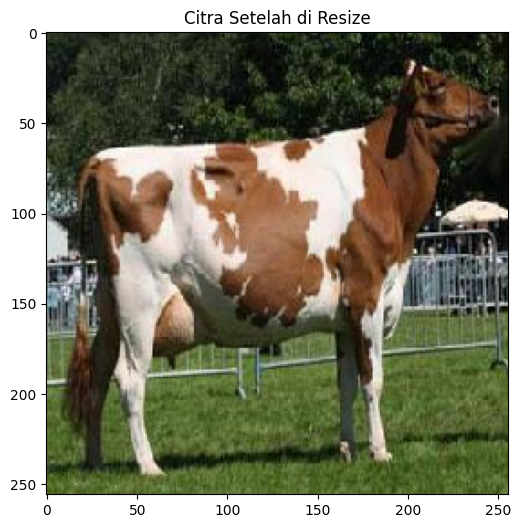

In [6]:
# Tampil contoh citra setelah resize
first_res = res_data[8]

plt.figure(figsize=(8, 6))
plt.title('Citra Setelah di Resize')
plt.imshow(first_res)
print("Derajat keabuan paling besar: %d \n" %res_data[8].max())

Memilih gambar dari daftar res_data menggunakan pengindeksan. Dalam hal ini, ia memilih gambar pada indeks 8, yang ditetapkan ke variabel first_res.
Kemudian membuat gambar menggunakan plt.figure(figsize=(8, 6)) dengan ukuran tertentu.
Judul gambar ditetapkan sebagai "Citra Setelah di Resize" menggunakan plt.title('Citra Setelah di Resize').
First_res gambar yang diubah ukurannya ditampilkan menggunakan plt.imshow(first_res).
Setelah itu mencetak nilai skala abu-abu maksimum dari gambar yang diubah ukurannya menggunakan res_data[8].max(), yang ditampilkan sebagai bagian dari string yang dicetak menggunakan %d.

In [7]:
savePath = "hasil/resize/"
for i in range(len(res_data)):
    save = savePath + file_name[i] + ".jpg"
    rgb_image = cv2.cvtColor(res_data[i], cv2.COLOR_BGR2RGB)  # Mengubah citra menjadi format warna RGB
    cv2.imwrite(save, rgb_image)

Variabel savePath diatur ke jalur direktori tempat gambar yang diubah ukurannya akan disimpan. Dalam hal ini, disetel ke "hasil/resize/".
Kemudian dilakukan perulangan pada indeks daftar res_data menggunakan fungsi range(len(res_data)) .
Untuk setiap indeks i, ini membuat nama file untuk menyimpan gambar dengan menggabungkan savePath, file_name[i], dan ekstensi file .jpg. Nama file yang dihasilkan diberikan ke variabel simpan.
Kemudian mengubah gambar dari format BGR ke RGB menggunakan cv2.cvtColor(res_data[i], cv2.COLOR_BGR2RGB) dan menetapkan hasilnya ke variabel rgb_image.
Fungsi cv2.imwrite(save, rgb_image) dipanggil untuk menyimpan rgb_image dengan nama file dan jalur yang ditentukan.
Pengulangan berlanjut hingga semua gambar dalam daftar res_data telah diproses dan disimpan.

## SHARPENING

In [8]:
# Proses sharpening pada citra
kernel_sharpening = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])

sharpened_data = []
for img in res_data:
    sharpened_img = cv2.filter2D(src=img, ddepth=-1, kernel=kernel_sharpening)
    sharpened_data.append(sharpened_img)

Mendefinisikan kernel penajaman sebagai larik NumPy. Kernel adalah matriks 3x3 yang merepresentasikan bobot untuk operasi penajaman.
Daftar kosong bernama sharped_data diinisialisasi untuk menyimpan gambar yang diasah.
Kemudian melakukan perulangan pada setiap gambar dalam daftar res_data.
Untuk setiap gambar, menerapkan filter penajaman menggunakan cv2.filter2D(). Parameter src diatur ke gambar saat ini (img), parameter ddepth diatur ke -1 untuk mempertahankan kedalaman yang sama dengan gambar input, dan parameter kernel diatur ke kernel penajaman yang ditentukan sebelumnya.
Hasil operasi penajaman disimpan dalam variabel sharped_img.
sharped_img ditambahkan ke daftar sharped_data.
Setelah semua gambar dalam daftar res_data diproses, loop berakhir.
Daftar Sharped_data sekarang berisi gambar yang dipertajam.

In [9]:
savePath = "hasil/sharpening/"
for i, img in enumerate(sharpened_data):
    save = savePath + "sharpened_" + str(i) + ".png"
    img_rgb = np.clip(img, 0, 255).astype(np.uint8)  # Convert to 8-bit unsigned integer
    img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.imsave(save, img_rgb)

Variabel savePath diatur ke jalur direktori tempat gambar yang dipertajam akan disimpan. Dalam hal ini, disetel ke "hasil/mengasah/".
Kemudian melakukan perulangan pada gambar yang dipertajam dalam daftar sharped_data menggunakan fungsi enumerate() . Variabel loop i mewakili indeks gambar, dan img mewakili gambar sebenarnya.
Untuk setiap gambar, itu membuat nama file untuk menyimpan gambar dengan menggabungkan savePath, "sharpened_", indeks i dikonversi menjadi string, dan ekstensi file .png. Nama file yang dihasilkan diberikan ke variabel simpan.
Operasi np.clip(img, 0, 255).astype(np.uint8) memastikan bahwa nilai piksel gambar berada dalam rentang yang valid dari 0 hingga 255 dan mengubah gambar menjadi format integer 8-bit tanpa tanda tangan.
Fungsi cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB) mengubah gambar dari format BGR ke RGB. Perhatikan bahwa nama variabel telah diubah dari img_rgb menjadi img di baris ini.
Fungsi plt.imsave(save, img_rgb) digunakan untuk menyimpan img_rgb sebagai gambar PNG dengan nama file dan path yang ditentukan.
Pengulangan berlanjut hingga semua gambar yang diasah dalam daftar sharped_data telah diproses dan disimpan.

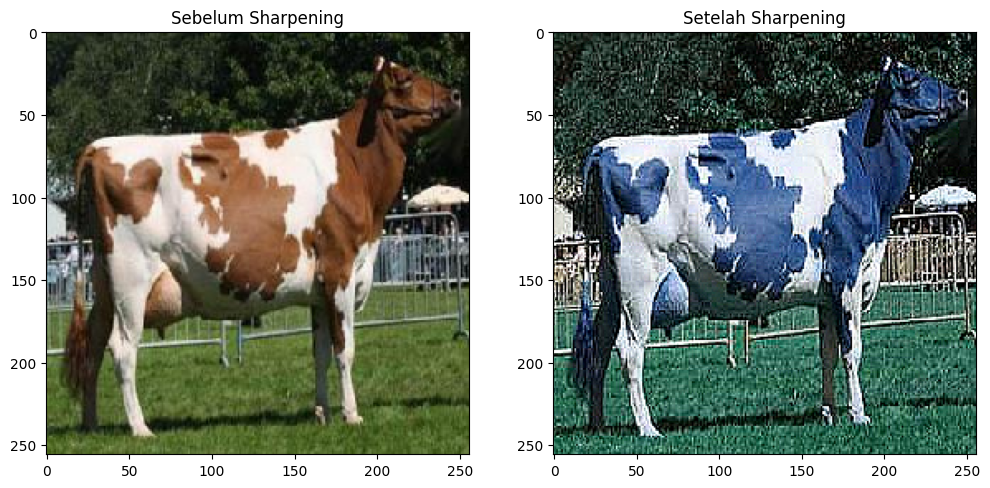

In [10]:
# Menampilkan citra sebelum sharpening
first_data = np.clip(res_data[8], 0, 255).astype(np.uint8)
#first_data_rgb = cv2.cvtColor(first_data, cv2.COLOR_BGR2RGB)

# Menampilkan citra setelah sharpening
sharpened_rgb_data = np.clip(sharpened_data[8], 0, 255).astype(np.uint8)
sharpened_rgb_data_rgb = cv2.cvtColor(sharpened_rgb_data, cv2.COLOR_BGR2RGB)

# Menampilkan citra sebelum dan setelah sharpening
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(first_data)
plt.title('Sebelum Sharpening')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_rgb_data_rgb)
plt.title('Setelah Sharpening')

plt.show()

Citra asli sebelum ditajam disimpan dalam variabel data_pertama, yang diperoleh dari daftar res_data pada indeks 8. Nilai piksel data_pertama diklip ke kisaran 0-255 dan diubah menjadi tipe data uint8 menggunakan np.clip() dan astype(np.uint8).
Gambar yang dipertajam disimpan dalam variabel sharped_rgb_data_rgb, yang diperoleh dari daftar sharped_data pada indeks 8. Nilai piksel dari sharped_rgb_data dipotong ke kisaran 0-255 dan diubah menjadi tipe data uint8. Kemudian, gambar diubah dari format warna BGR ke RGB menggunakan cv2.cvtColor().
Plot dengan dua subplot dibuat menggunakan plt.subplot() dengan ukuran 1 baris dan 2 kolom.
Pada subplot pertama (plt.subplot(1, 2, 1)), gambar asli sebelum diasah ditampilkan menggunakan plt.imshow(first_data). Judul subplot diatur ke 'Sebelum Penajaman'.
Di subplot kedua (plt.subplot(1, 2, 2)), gambar yang dipertajam ditampilkan menggunakan plt.imshow(sharpened_rgb_data_rgb). Judul subplot diatur ke 'Setelah Diasah'.
Fungsi plt.show() dipanggil untuk menampilkan plot dengan dua gambar berdampingan.

## SEGMENTASI HAPUS BACKGROUND

In [21]:
def remove_background(image):
    # Konversi citra ke format HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Tentukan rentang warna untuk bercak kuning
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([40, 255, 255])
    
    # Tentukan rentang warna untuk bercak oranye
    lower_orange = np.array([5, 100, 100])
    upper_orange = np.array([15, 255, 255])
    
    # Tentukan rentang warna untuk bercak putih
    lower_white = np.array([0, 0, 200])
    upper_white = np.array([40, 50, 255])
    
    # Tentukan rentang warna untuk bercak hijau
    lower_green = np.array([30, 50, 50])
    upper_green = np.array([90, 255, 255])
    
    # Tentukan rentang warna untuk bercak cream
    lower_cream = np.array([0, 50, 150])
    upper_cream = np.array([30, 150, 220])
    
    # Tentukan rentang warna untuk bercak coklat
    lower_brown = np.array([10, 50, 50])
    upper_brown = np.array([20, 255, 255])
    
    # Mask untuk bercak kuning
    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
    
    # Mask untuk bercak oranye
    mask_orange = cv2.inRange(hsv, lower_orange, upper_orange)
    
    # Mask untuk bercak putih
    mask_white = cv2.inRange(hsv, lower_white, upper_white)
    
    # Mask untuk bercak hijau
    mask_green = cv2.inRange(hsv, lower_green, upper_green)
    
    # Mask untuk bercak cream
    mask_cream = cv2.inRange(hsv, lower_cream, upper_cream)
    
    # Mask untuk bercak coklat
    mask_brown = cv2.inRange(hsv, lower_brown, upper_brown)
    
    # Menggabungkan semua mask
    mask = cv2.bitwise_or(mask_yellow, mask_orange)
    mask = cv2.bitwise_or(mask, mask_white)
    mask = cv2.bitwise_or(mask, mask_green)
    mask = cv2.bitwise_or(mask, mask_cream)
    mask = cv2.bitwise_or(mask, mask_brown)
    
    # Menghilangkan latar belakang menggunakan mask
    result = cv2.bitwise_and(image, image, mask=mask)
    
    return result

In [22]:
# Array to store the images with background removed
background_removed_data = []

# Remove background from each image in the array
for img in sharpened_data:
    img_uint8 = np.clip(img, 0, 255).astype(np.uint8)
    result = remove_background(img_uint8)
    img_rgb_data = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    background_removed_data.append(img_rgb_data)

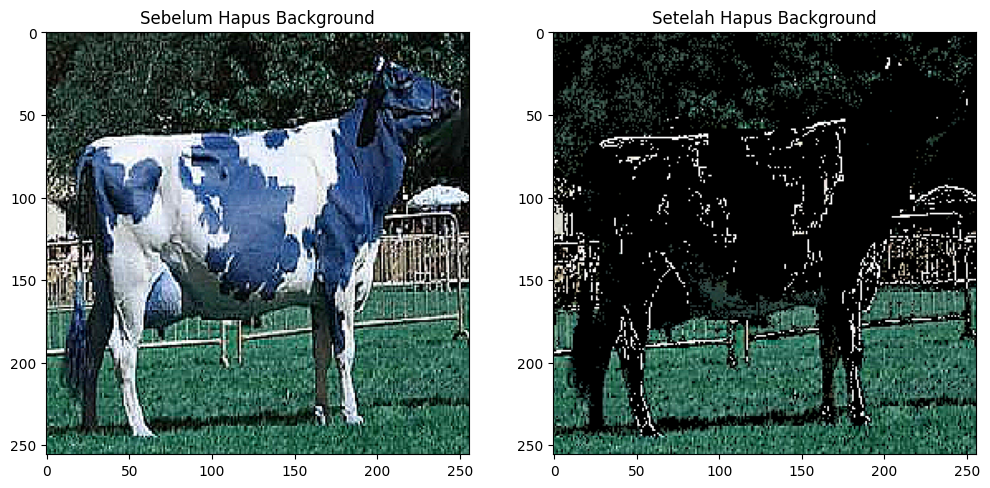

In [23]:
# Menampilkan citra sebelum sharpening
first_data = np.clip(sharpened_data[8], 0, 255).astype(np.uint8)
first_data_rgb = cv2.cvtColor(first_data, cv2.COLOR_BGR2RGB)

# Menampilkan citra setelah sharpening
background_rgb_data = np.clip(background_removed_data[8], 0, 255).astype(np.uint8)
#background_rgb_data_rgb = cv2.cvtColor(background_rgb_data, cv2.COLOR_BGR2RGB)

# Menampilkan citra sebelum dan setelah sharpening
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(first_data_rgb)
plt.title('Sebelum Hapus Background')

plt.subplot(1, 2, 2)
plt.imshow(background_rgb_data)
plt.title('Setelah Hapus Background')

plt.show()

In [24]:
save_path = 'hasil/hapus_background/'
for i, img in enumerate(background_removed_data):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Menyusun path dan nama file untuk disimpan
    save = save_path + 'background_removed_' + str(i) + '.jpg'
    # Menyimpan citra dalam format RGB
    cv2.imwrite(save, img_rgb)

## GRAYSCALE


In [11]:
grayscale = []
for i in range(len(res_data)):
    img_gray = cv2.cvtColor(res_data[i],cv2.COLOR_RGB2GRAY)
    grayscale.append(img_gray)

Daftar kosong yang disebut grayscale diinisialisasi untuk menyimpan gambar skala abu-abu.
Kemudian melakukan perulangan pada indeks daftar res_data menggunakan fungsi range(len(res_data)) .
Untuk setiap indeks i, ia mengambil gambar yang diubah ukurannya dari daftar res_data menggunakan res_data[i].
Fungsi cv2.cvtColor() kemudian dipanggil untuk mengonversi gambar yang diubah ukurannya menjadi skala abu-abu. res_data[i] diteruskan sebagai gambar sumber, dan cv2.COLOR_RGB2GRAY digunakan sebagai flag konversi.
Gambar skala abu-abu yang dihasilkan (img_gray) ditambahkan ke daftar skala abu-abu.
Setelah semua gambar dalam daftar res_data diproses, loop berakhir.
Daftar skala abu-abu sekarang berisi versi skala abu-abu dari gambar yang diubah ukurannya.

In [12]:
savePath = "hasil/grayscale/"
for i in range(len(grayscale)):
    save = savePath + file_name[i] + ".jpg"
    image_gray = grayscale[i]
    cv2.imwrite(save, image_gray)

Variabel savePath diatur ke jalur direktori tempat gambar skala abu-abu akan disimpan. Dalam hal ini, disetel ke "hasil/grayscale/".
Kemudian melakukan perulangan pada indeks daftar skala abu-abu menggunakan fungsi range(len(grayscale)).
Untuk setiap indeks i, ini membuat nama file untuk menyimpan gambar dengan menggabungkan savePath, file_name[i], dan ekstensi file .jpg. Nama file yang dihasilkan diberikan ke variabel simpan.
Itu mengambil gambar grayscale dari daftar grayscale menggunakan grayscale[i] dan menugaskannya ke variabel image_gray.
Fungsi cv2.imwrite(save, image_gray) dipanggil untuk menyimpan image_gray sebagai gambar JPEG dengan nama file dan path yang ditentukan.
Perulangan berlanjut hingga semua gambar skala abu-abu dalam daftar skala abu-abu telah diproses dan disimpan.

Text(0.5, 1.0, 'Grayscale')

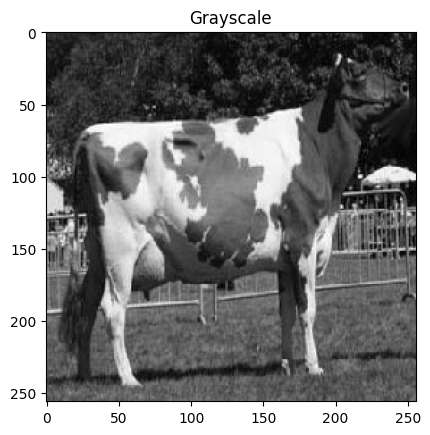

In [31]:
plt.imshow(grayscale[8], 'gray')
plt.title("Grayscale")

plt.imshow(grayscale[8], 'gray') untuk menampilkan gambar skala abu-abu dari daftar skala abu-abu. Skala abu-abu[8] memilih gambar pada indeks 8, dan 'abu-abu' menentukan peta warna yang akan digunakan, yang dalam hal ini adalah peta warna skala abu-abu.
plt.title("Grayscale") digunakan untuk menetapkan judul plot sebagai "Grayscale".

## BINER

In [33]:
biner = []
for i in range(len(grayscale)):
    ret, binary = cv2.threshold(grayscale[i],128,255,cv2.THRESH_BINARY)
    binary -= 1
    biner.append(binary)

Daftar kosong yang disebut biner diinisialisasi untuk menyimpan citra biner.
Kemudian dilakukan perulangan pada indeks daftar skala abu-abu menggunakan fungsi range(len(grayscale)).
Untuk setiap indeks i, ia mengambil gambar skala abu-abu dari daftar skala abu-abu menggunakan skala abu-abu[i].
Fungsi cv2.threshold() kemudian dipanggil untuk melakukan binarisasi pada gambar skala abu-abu. Dibutuhkan parameter berikut: gambar sumber (grayscale[i]), nilai ambang batas (128 dalam kasus ini), nilai piksel maksimum (255), dan metode ambang batas (cv2.THRESH_BINARY).
Hasil operasi thresholding terdiri dari dua nilai yaitu nilai threshold yang digunakan (ret) dan citra biner (binary). Namun, dalam kode ini, nilai ret tidak digunakan.
Citra biner (biner) dikurangi dengan 1 menggunakan ekspresi biner -= 1. Langkah ini tampaknya tidak diperlukan karena mengurangi 1 dari semua nilai piksel pada citra biner.
Gambar biner yang dihasilkan (biner) ditambahkan ke daftar biner.
Setelah semua gambar skala abu-abu dalam daftar skala abu-abu diproses, loop berakhir.
Daftar biner sekarang berisi versi binerisasi dari gambar skala abu-abu.

In [34]:
savePath = "hasil/biner/"
for i in range(len(biner)):
    save = savePath + file_name[i] + ".jpg"
    image_gray = biner[i]
    cv2.imwrite(save, image_gray)

Variabel savePath diatur ke jalur direktori tempat gambar biner akan disimpan. Dalam hal ini, disetel ke "hasil/biner/".
Kemudian melakukan perulangan yang beriterasi pada indeks dari daftar biner menggunakan fungsi range(len(biner)).
Untuk setiap indeks i, ini membuat nama file untuk menyimpan gambar dengan menggabungkan savePath, file_name[i], dan ekstensi file .jpg. Nama file yang dihasilkan diberikan ke variabel simpan.
Ini mengambil gambar biner dari daftar biner menggunakan biner[i] dan menugaskannya ke variabel image_gray.
Fungsi cv2.imwrite(save, image_gray) dipanggil untuk menyimpan image_gray sebagai gambar JPEG dengan nama file dan path yang ditentukan.
Pengulangan berlanjut hingga semua citra biner dalam daftar biner telah diproses dan disimpan.

Text(0.5, 1.0, 'Grayscale')

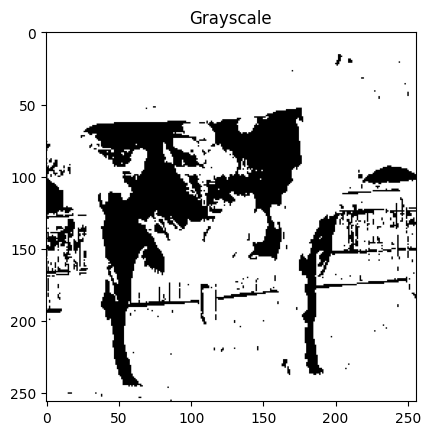

In [35]:
plt.imshow(biner[8], 'gray')
plt.title("Grayscale")

plt.imshow(grayscale[8], 'gray') untuk menampilkan gambar skala abu-abu dari daftar skala abu-abu. Skala abu-abu[8] memilih gambar pada indeks 8, dan 'abu-abu' menentukan peta warna yang akan digunakan, yang dalam hal ini adalah peta warna skala abu-abu.
plt.title("Grayscale") digunakan untuk menetapkan judul plot sebagai "Grayscale".

## MORFOLOGI CITRA

In [36]:
# Definisikan kernel
kernel = np.ones((3, 3), np.uint8)

# Inisialisasi array untuk menyimpan hasil morfologi
erosi_results = []
dilasi_results = []
opening_results = []
closing_results = []

# Lakukan operasi morfologi pada setiap citra dalam array segmented_data
for image in biner:
    # Dilasi
    dilated = cv2.dilate(image, kernel, iterations=1)
    dilated-=1
    
    # Erosi
    eroded = cv2.erode(image, kernel, iterations=1)
    eroded -=1
    
    # Opening
    opened = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    opened -=1
    
    # Closing
    closed = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    closed -=1

    # Tambahkan hasil morfologi ke dalam array morphology_results
    erosi_results.append(eroded)
    dilasi_results.append(dilated)
    opening_results.append(opened)
    closing_results.append(closed)


In [39]:
save_path = 'hasil/morfologi/'
for i, img in enumerate(closing_results):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    save = save_path + 'closing_' + str(i) + '.jpg'
    cv2.imwrite(save, img_rgb)

Variabel save_path diatur ke jalur direktori tempat hasil operasi morfologi akan disimpan. Dalam hal ini diatur ke "hasil/morfologi/".
Kemudian dilakukan perulangan pada gambar di daftar closing_results menggunakan fungsi enumerate() . Variabel loop i mewakili indeks gambar, dan img mewakili gambar sebenarnya.
Dalam setiap iterasi, gambar img diubah dari format BGR ke RGB menggunakan cv2.cvtColor(img, cv2.COLOR_BGR2RGB). Gambar yang dihasilkan dalam format RGB ditetapkan ke variabel img_rgb.
Nama file untuk menyimpan gambar dibuat dengan menggabungkan save_path, "closing_", indeks i yang dikonversi menjadi string, dan ekstensi file .jpg. Nama file yang dihasilkan diberikan ke variabel simpan.
Fungsi cv2.imwrite(save, img_rgb) dipanggil untuk menyimpan img_rgb sebagai gambar JPEG dengan nama dan jalur file yang ditentukan.
Pengulangan berlanjut hingga semua gambar dalam daftar closing_results telah diproses dan disimpan.

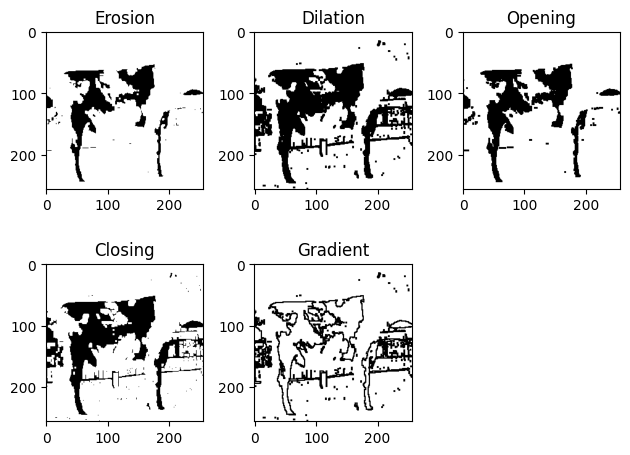

In [30]:
# Memilih indeks citra yang ingin ditampilkan
image_index = 8

# Mengambil citra hasil morfologi dan citra segmented dari indeks yang dipilih
image_erosion = erosi_results[image_index]
image_dilation = dilasi_results[image_index]
image_opening = opening_results[image_index]
image_closing = closing_results[image_index]
image_gradient = image_dilation - image_erosion
image_gradient -=1

# Menampilkan citra hasil morfologi erosi
plt.subplot(2, 3, 1)
plt.imshow(image_erosion, 'gray')
plt.title('Erosion')

# Menampilkan citra hasil morfologi dilasi
plt.subplot(2, 3, 2)
plt.imshow(image_dilation, 'gray')
plt.title('Dilation')

# Menampilkan citra hasil morfologi opening
plt.subplot(2, 3, 3)
plt.imshow(image_opening, 'gray')
plt.title('Opening')

# Menampilkan citra hasil morfologi closing
plt.subplot(2, 3, 4)
plt.imshow(image_closing, 'gray')
plt.title('Closing')

plt.subplot(2, 3, 5)
plt.imshow(image_gradient, 'gray')
plt.title('Gradient')

plt.tight_layout()
plt.show()


## FILTERING

In [40]:
def sorting(arr): #di sort ini harus jd 1 array
    for i in range(len(arr)): 
        swap = i + np.argmin(arr[i:])
        (arr[i], arr[swap]) = (arr[swap], arr[i])
    return arr

Fungsi iterasi pada setiap elemen dalam larik masukan menggunakan perulangan for dengan variabel perulangan i.
Untuk setiap iterasi, swap variabel diberi indeks elemen minimum di bagian sisa array yang tidak disortir arr[i:]. Ini dilakukan dengan menggunakan np.argmin() pada subarray arr[i:] dan menambahkan i ke hasilnya.
Elemen pada indeks i dan swap ditukar menggunakan penugasan tuple. Ini menukar elemen saat ini dengan elemen minimum yang ditemukan di bagian array yang tidak disortir.
Perulangan berlanjut sampai semua elemen dalam array telah diurutkan.
Array yang diurutkan dikembalikan sebagai output.

In [41]:
def flatArray(arr): #buat jadiin array 1 dimensi
    row, col = arr.shape 
    flat=[]
    for i in range (row):
        for j in range (col):
            flat.append(arr[i][j]) #buat nambahin nilai ke list
    return flat

Fungsi mengambil array input arr sebagai argumen.
Bentuk array input diperoleh dengan menggunakan arr.shape, yang mengembalikan tuple (baris, kolom) yang mewakili jumlah baris dan kolom dalam array.
Flat daftar kosong dibuat untuk menyimpan elemen yang diratakan.
Fungsi ini menggunakan loop bersarang untuk mengulang setiap elemen dalam larik dua dimensi. Loop luar beriterasi pada baris (i), dan loop dalam beriterasi pada kolom (j).
Untuk setiap elemen, arr[i][j], ditambahkan ke daftar datar menggunakan flat.append(arr[i][j]).
Setelah mengulangi semua elemen dalam array, daftar datar yang diratakan dikembalikan sebagai output.

In [42]:
def median(image,windowHeight,windowWidth):
    pad = np.pad(image,(windowHeight,windowWidth),mode='edge')
    median = np.zeros(image.shape, dtype=np.uint8)
    for i in range(windowHeight,len(pad)-windowHeight): 
        for j in range(windowWidth,len(pad)-windowWidth):
            window = flatArray(pad[i-windowHeight:i,j-windowWidth:j])
            window = sorting(window)
            median[i-windowHeight,j-windowWidth] = window[ceil(len(window)/2)]
    return median

Fungsi ini mengambil input image image dan dimensi jendela pemfilteran windowHeight dan windowWidth sebagai argumen.
Gambar diisi dengan nilai edge menggunakan fungsi np.pad(). Padding dilakukan untuk memastikan bahwa jendela pemfilteran tidak melampaui batas gambar.
Median larik keluaran dibuat dengan bentuk yang sama dengan gambar masukan untuk menyimpan hasil yang difilter.
Fungsi ini menggunakan loop bersarang untuk mengulang setiap lokasi piksel dalam gambar yang diisi, tidak termasuk wilayah pengisi. Loop luar beriterasi pada baris (i), dan loop dalam beriterasi pada kolom (j).
Untuk setiap lokasi piksel, jendela pemfilteran diekstrak menggunakan fungsi flatArray() untuk meratakan subarray di dalam batas jendela.
Jendela yang diratakan kemudian diurutkan menggunakan fungsi sorting() untuk mendapatkan nilai dalam urutan menaik.
Nilai median dihitung dengan memilih elemen tengah dari jendela yang diurutkan, yang diakses menggunakan window[ceil(len(window)/2)].
Nilai median ditetapkan ke lokasi piksel yang sesuai dalam larik median.
Setelah mengulangi semua lokasi piksel, larik median, yang mewakili gambar yang difilter median, dikembalikan sebagai output.

## Pattern Detection

In [116]:
def getPattern(image):
    ret,parasit = cv2.threshold(image,118,255,cv2.THRESH_BINARY)
    parasit-=255
    return parasit

Fungsi mengambil gambar gambar input sebagai argumen.
Operasi ambang batas biner diterapkan pada gambar menggunakan cv2.threshold(). Operasi ini mengubah citra menjadi citra biner, dimana piksel dengan nilai intensitas di atas threshold 118 diset ke 255 (putih) dan pixel di bawah threshold diset ke 0 (hitam).
Gambar biner yang dihasilkan dikurangi dari 255 menggunakan pernyataan parasit -= 255. Operasi ini membalikkan gambar biner, membuat pola tampak putih pada latar belakang hitam.
Gambar terbalik yang mewakili pola dikembalikan sebagai output.

In [117]:
imgOri = res_data[8]

imgOri = res_data[8] menugaskan gambar pada indeks 8 dari daftar res_data ke variabel imgOri. Ini memungkinkan Anda untuk mengakses dan memanipulasi gambar asli menggunakan variabel imgOri dalam kode selanjutnya.

In [118]:
pattern=getPattern(grayscale[8])

pattern= getPattern(grayscale[8]) memanggil fungsi getPattern() dan meneruskan gambar skala abu-abu pada indeks 8 daftar skala abu-abu sebagai argumen. Pola yang dikembalikan, yang merupakan hasil dari ekstraksi pola dari gambar skala abu-abu, ditetapkan ke pola variabel. Anda sekarang dapat menggunakan variabel pola dalam pemrosesan atau analisis lebih lanjut.

In [119]:
dilasi = cv2.dilate(pattern,kernel)

Fungsi cv2.dilate() dipanggil dengan dua argumen: gambar pola dan kernel.
Operasi pelebaran memperluas wilayah putih (latar depan) dari gambar pola. Ini mempertimbangkan bentuk dan ukuran kernel untuk menentukan tingkat pelebaran.
Gambar melebar yang dihasilkan ditugaskan ke variabel dilasi.

In [120]:
medPattern = median(dilasi, 4, 4)

Fungsi median() membutuhkan tiga argumen: dilasi gambar yang dilebarkan dan tinggi dan lebar jendela (keduanya disetel ke 4 dalam kasus ini).
Fungsi median() menerapkan operasi pemfilteran median ke gambar yang dilebarkan menggunakan ukuran jendela yang ditentukan. Operasi ini menggantikan setiap nilai piksel dengan nilai median piksel dalam jendela yang berpusat di sekitar piksel tersebut.
Gambar yang dihasilkan setelah pemfilteran median ditetapkan ke variabel medPattern.

In [121]:
maskPattern = cv2.bitwise_and(imgOri, imgOri, mask=medPattern)

Fungsi cv2.bitwise_and() dipanggil dengan tiga argumen: imgOri, imgOri, dan medPattern.
Fungsi melakukan operasi bitwise DAN antara piksel yang sesuai dari imgOri dan medPattern. Operasi bitwise AND menjaga piksel di mana imgOri dan medPattern memiliki nilai bukan nol, sementara menyetel semua piksel lainnya ke nol.
Gambar yang dihasilkan, yang merepresentasikan pola bertopeng yang diekstrak dari gambar asli, ditetapkan ke variabel maskPattern.

In [122]:
grayPattern = cv2.cvtColor(maskPattern, cv2.COLOR_RGB2GRAY)

Fungsi cv2.cvtColor() dipanggil dengan dua argumen: maskPattern dan cv2.COLOR_RGB2GRAY.
Fungsi mengubah ruang warna maskPattern dari RGB ke skala abu-abu. Konversi ini mengubah gambar dari representasi RGB tiga saluran menjadi representasi skala abu-abu saluran tunggal.
Gambar skala abu-abu yang dihasilkan, yang merepresentasikan nilai intensitas dari pola bertopeng, ditetapkan ke variabel pola abu-abu.

In [123]:
contours, hierarchy = cv2.findContours(grayPattern, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
patternDraw = cv2.drawContours(imgOri, contours, -1, (0,255,0), 2)

kontur, hierarki = cv2.findContours(grayPattern, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
Baris ini menemukan kontur pada gambar grayPattern menggunakan fungsi cv2.findContours(). Fungsi mengambil tiga argumen:
grayPattern: Gambar skala abu-abu masukan di mana Anda ingin menemukan kontur.
cv2.RETR_TREE: Mode pengambilan kontur, yang mengambil semua kontur dan membuat representasi hierarki penuh.
cv2.CHAIN_APPROX_SIMPLE: Metode perkiraan kontur, yang memampatkan kontur hanya dengan menyimpan titik akhirnya.
Fungsi mengembalikan dua nilai: kontur dan hierarki.
kontur: Daftar yang berisi kontur yang terdeteksi.
hirarki: Sebuah representasi dari hirarki kontur.
patternDraw = cv2.drawContours(imgOri, kontur, -1, (0,255,0), 2)
Baris ini menggambar kontur pada gambar imgOri menggunakan fungsi cv2.drawContours(). Fungsi mengambil parameter berikut:
imgOri: Gambar input tempat Anda ingin menggambar kontur.
kontur: Daftar kontur yang diperoleh dari langkah sebelumnya.
-1: Menentukan bahwa semua kontur harus digambar.
(0, 255, 0): Warna kontur yang digambar. Dalam hal ini, ini mewakili warna hijau dalam ruang warna BGR.
2: Ketebalan garis kontur.
Hasil menggambar kontur disimpan dalam variabel patternDraw. Anda dapat menggunakan variabel ini untuk memproses lebih lanjut atau menampilkan gambar dengan kontur yang digambar di atasnya.

In [124]:
def tampilkanGambar(images, titles, row, col):
    plt.figure(figsize=(10,10))
    for i in range(row):
        for j in range (col):
            plt.subplot(row,col,i*col+(j+1))
            plt.grid(color="none")
            plt.imshow(images[i*col+j],'gray')
            plt.title(titles[i*col+j])
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(10,10)): Baris ini membuat objek gambar baru dengan ukuran 10x10 inci.
Pengulangan for bersarang mengulangi baris (i) dan kolom (j) kisi.
plt.subplot(row,col,i*col+(j+1)): Baris ini memilih subplot saat ini dalam kisi berdasarkan indeks baris dan kolom saat ini. Nomor subplot dihitung menggunakan rumus i*col+(j+1).
plt.grid(color="none"): Baris ini menghapus garis grid dari subplot saat ini.
plt.imshow(images[i*col+j],'gray'): Baris ini menampilkan gambar pada indeks i*col+j dari daftar gambar dalam format skala abu-abu pada subplot saat ini.
plt.title(titles[i*col+j]): Baris ini menyetel judul subplot saat ini ke judul yang sesuai pada indeks i*col+j dari daftar judul.
plt.tight_layout(): Baris ini menyesuaikan jarak antar subplot untuk menghindari tumpang tindih.
plt.show(): Baris ini menampilkan grid subplot yang berisi gambar dan judul.

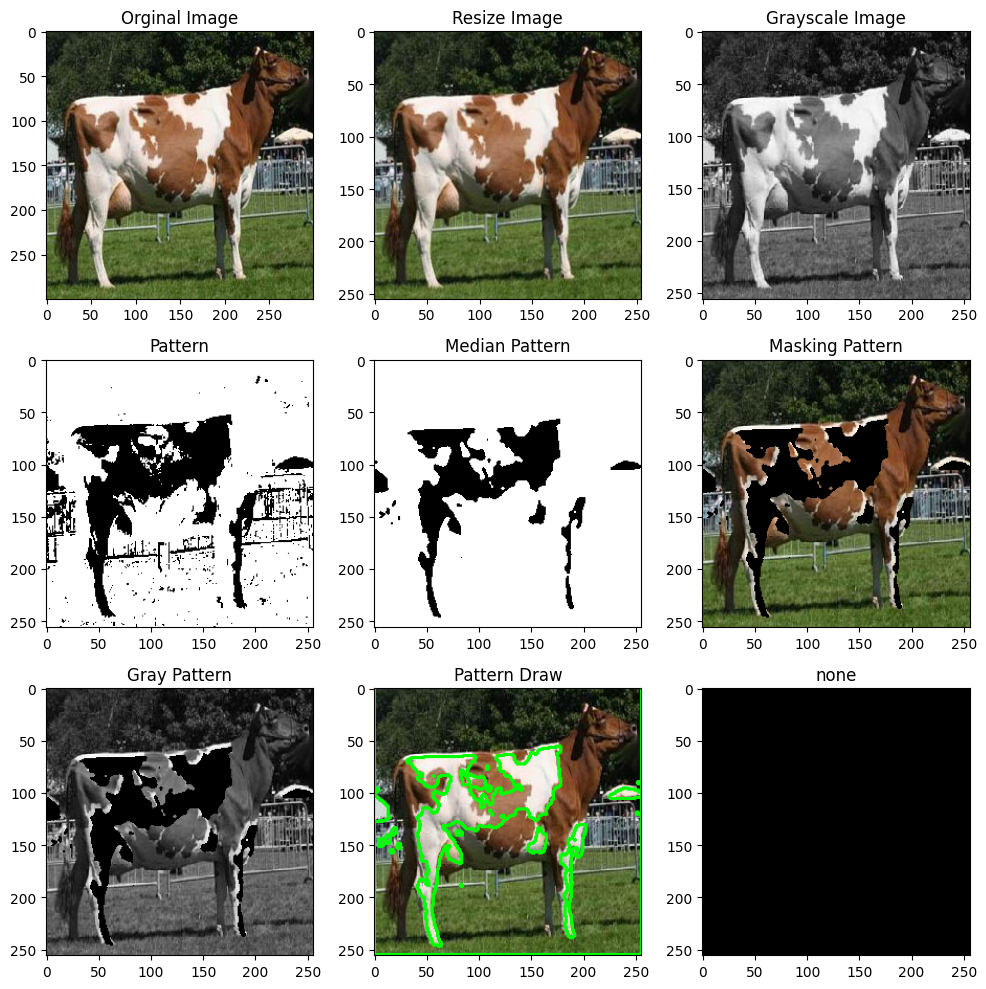

In [125]:
none = np.zeros(img.shape)
img = cv2.resize(data[8], (255,255))
original_img = data[8]

titles = ['Orginal Image','Resize Image', 'Grayscale Image', 'Pattern',
    'Median Pattern', 'Masking Pattern', 'Gray Pattern', 'Pattern Draw', 'none']

hasilimage = [data[8],img, grayscale[8], pattern, medPattern, maskPattern,
    grayPattern, patternDraw, none]

tampilkanGambar(hasilimage, titles, 3, 3)

none = np.zeros(img.shape): Baris ini membuat array berisi nol (np.zeros) yang memiliki bentuk yang sama dengan variabel img. Sepertinya baris ini tidak diperlukan dan dapat dihapus.
img = cv2.resize(data[8], (255,255)): Baris ini mengubah ukuran gambar pada indeks 8 dari larik data menggunakan fungsi cv2.resize. Ini mengubah ukuran gambar menjadi lebar dan tinggi 255 piksel.
original_img = data[8]: Baris ini menetapkan gambar asli pada indeks 8 dari larik data ke variabel original_img.
tittles : Ini adalah daftar judul gambar yang ingin Anda tampilkan. Setiap judul sesuai dengan gambar dalam daftar hasilgambar.
hasilimage: Ini adalah daftar gambar yang ingin Anda tampilkan dalam tata letak grid. Gambar sesuai urutan judul.
tampilkanGambar(hasilimage, judul, 3, 3): Baris ini memanggil fungsi tampilkanGambar dengan daftar hasilgambar, daftar judul, dan dimensi grid 3 baris dan 3 kolom. Ini menampilkan gambar dalam kotak dengan judul masing-masing.

## EKSTRAKSI CIRI

In [126]:
folders_hasil = [
    "data/Ayrshire_cattle",
    "data/Brown_Swiss_cattle/",
    "data/Holstein_Friesian_cattle/"
]

data2 = []
labels = [] 
file_name = []

for folder in folders_hasil:
    dataset = os.listdir(folder)
    for file in dataset:
        img_path = os.path.join(folder, file)
        name = os.path.splitext(file)[0]
        temp = cv2.imread(img_path)
        rgb_data2 = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
        data2.append(rgb_data2)
        labels.append(folder)
        file_name.append(name)
        
data2 = np.array(data2)
labels = np.array(labels)

folders_hasil: Ini adalah daftar yang berisi jalur ke folder tempat gambar berada.
data2, label, nama_file: Ini adalah daftar kosong yang masing-masing akan menyimpan gambar yang dimuat, label yang sesuai, dan nama file. Kemudian dilakukan perulangan pada setiap folder di folders_hasil.
dataset = os.listdir(folder): Baris ini mengambil daftar file di folder saat ini menggunakan os.listdir().
img_path = os.path.join(folder, file): Baris ini membuat jalur lengkap ke file gambar dengan menggabungkan jalur folder saat ini dan nama file.
name = os.path.splitext(file)[0]: Baris ini mengekstrak nama file tanpa ekstensi menggunakan os.path.splitext().
temp = cv2.imread(img_path): Baris ini membaca file gambar menggunakan cv2.imread() dan menyimpannya dalam variabel temp.
rgb_data2 = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB): Baris ini mengonversi gambar BGR ke format RGB menggunakan cv2.cvtColor() dan menugaskannya ke variabel rgb_data2.
data2.append(rgb_data2): Baris ini menambahkan data gambar RGB ke daftar data2.
labels.append(folder): Baris ini menambahkan jalur folder saat ini ke daftar label sebagai label yang sesuai untuk gambar.
file_name.append(name): Baris ini menambahkan nama file (tanpa ekstensi) ke daftar nama_file.
data2 = np.array(data2): Baris ini mengonversi daftar data2 menjadi array numpy agar lebih mudah dimanipulasi.
labels = np.array(labels): Baris ini mengonversi daftar label menjadi array numpy.

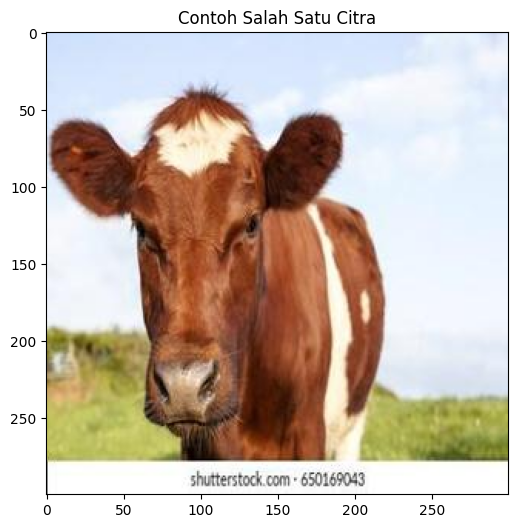

In [127]:
# Tampil contoh citra 1
data_hasil = data2[4]

plt.figure(figsize=(8, 6))
plt.title('Contoh Salah Satu Citra')
plt.imshow(data_hasil)

In [128]:
def derajat0 (img):

    #mencari nilai terbesar atau tertinggi dari piksel image
    max = np.max(img)

    #membuat array kosong yang nantinya digunakan untuk menampung hasil concurence dari image
    imgTmp = np.zeros([max+1,max+1])

    #looping agar dapat mengolah semua piksel pada gambar
    for i in range (len(img)): #looping untuk kolom
        for j in range(len(img[i])-1): #looping untuk baris

            #menentukan matrik concurence
            #dimana derajat0 berarti pengambilan nilai piksel kekanan dari piksel asal
            #misalkan jika piksel[0,0] = 1 dan piksel[0,1]=3(dikanannnya piksel[0,0]), maka
            #concurence[1,3] akan ditambah 1 dan seterusnya
            imgTmp[img[i,j],img[i,j+1]] +=1

    #mentranpos array hasil concurence
    transpos = np.transpose(imgTmp)

    #menjumlahkan array transpos dengan concurence
    data = imgTmp+transpos

    #membuat var yang nantinya digunakan untuk menyimpan hasil penjumlahan
    tmp = 0
    #normalisasi
    for i in range (len(data)):
        for j in range(len(data)):
            #menambahkan semua piksel pada var data
            tmp+=data[i,j]

    for i in range(len(data)):
        for j in range(len(data)):
            #membagi data dengan hasil penambahan tadi
            data[i,j]/=tmp

    #mengembalikan var data
    return data

In [129]:
def derajat45 (img):

    #mencari nilai terbesar atau tertinggi dari piksel image
    max = np.max(img)

    #membuat array kosong yang nantinya digunakan untuk menampung hasil concurence dari image
    imgTmp=np.zeros([max+1,max+1])

    #looping agar dapat mengolah semua piksel pada gambar
    for i in range (len (img)-1):
        for j in range (len (img[i])-1):
            imgTmp[img[i+1,j],img[i,j+1]] += 1

    #mentranpos array hasil concurence
    transpos= np.transpose(imgTmp)

    #menjumlahkan array transpos dengan concurence
    data= imgTmp+transpos

    #membuat var yang nantinya digunakan untuk menyimpan hasil penjumlahan
    tmp=0
    #normalisasi
    for i in range (len(data)):
        for j in range (len(data)):
            #menambahkan semua piksel pada var data
            tmp+=data[i,j]

    for i in range (len (data)):
        for j in range (len (data)):
            #membagi data dengan hasil penambahan tadi
            data[i,j]/=tmp
    #mengembalikan var data
    return data

In [130]:
def derajat90 (img):

    #mencari nilai terbesar atau tertinggi dari piksel image
    max = np.max(img)

    #membuat array kosong yang nantinya digunakan untuk menampung hasil concurence dari image
    imgTmp=np.zeros([max+1,max+1])

    #looping agar dapat mengolah semua piksel pada gambar
    for i in range (len (img)-1):
        for j in range (len (img[i])):
            imgTmp[img[i+1,j],img[i,j]] += 1

    #mentranpos array hasil concurence
    transpos= np.transpose(imgTmp)

    #menjumlahkan array transpos dengan concurence
    data= imgTmp+transpos

    #membuat var yang nantinya digunakan untuk menyimpan hasil penjumlahan
    tmp=0
    #normalisasi
    for i in range (len(data)):
        for j in range (len(data)):
            #menambahkan semua piksel pada var data
            tmp+=data[i,j]

    for i in range (len (data)):
        for j in range (len (data)):
            #membagi data dengan hasil penambahan tadi
            data[i,j]/=tmp
    #mengembalikan var data
    return data

In [131]:
def derajat135 (img):

    #mencari nilai terbesar atau tertinggi dari piksel image
    max = np.max(img)

    #membuat array kosong yang nantinya digunakan untuk menampung hasil concurence dari image
    imgTmp=np.zeros([max+1,max+1])
    for i in range (len (img)-1):
        for j in range (len (img[i])-1):
            imgTmp[img[i,j],img[i+1,j+1]] += 1

    #mentranpos array hasil concurence
    transpos= np.transpose(imgTmp)

    #menjumlahkan array transpos dengan concurence
    data= imgTmp+transpos

    #membuat var yang nantinya digunakan untuk menyimpan hasil penjumlahan
    tmp=0
    #normalisasi
    for i in range (len(data)):
        for j in range (len(data)):
            #menambahkan semua piksel pada var data
            tmp+=data[i,j]

    for i in range (len (data)):
        for j in range (len (data)):
            #membagi data dengan hasil penambahan tadi
            data[i,j]/=tmp
    #mengembalikan var data
    return data

In [132]:
def dissimilarity(data):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data)):
        for j in range(len(data)):

            #rumus : p(x,y)+|i-j|
            simpan+= data[i,j]+abs(i-j)
    #mengembalikan nilai var simpan
    return simpan

In [133]:
def ASM(data):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data)):
        for j in range(len(data)):

            #rumus : p(x,y)^2
            simpan+= pow(data[i,j],2)
    #mengembalikan nilai var simpan
    return simpan

In [134]:
def contrast(data):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data)):
        for j in range(len(data)):

            #rumus : p(x,y)+(i-j)^2
            simpan+= data[i,j]+pow(i-j,2)
    #mengembalikan nilai var simpan
    return simpan

In [135]:
def entropi(data):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range(len(data)):
        for j in range(len(data)):
            if data[i,j] > 0:
                #rumus : -(p(x,y)*log^2(i-j)
                simpan+= -(data[i,j] * math.log2(data[i,j]))
    #mengembalikan nilai var simpan
    return simpan

In [136]:
def energy(data):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data)):
        for j in range(len(data)):
            #rumus : sqrt(p(x,y)^2) atau sqrt(ASM)
            simpan+=pow(data[i,j],2)
    #mengembalikan nilai var simpan
    return simpan

In [137]:
def homogenitas(data):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data)):
        for j in range(len(data)):
            #rumus : p(x,y)/1+(i-j)^2
            simpan+=data[i,j]/(1+pow((i-j),2))
    #mengembalikan nilai var simpan
    return simpan

In [138]:
def correlation(data,mI,mJ,tI,tJ):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+=((i-mI)*(j-mJ)*data[i,j])/(tI*tJ)
    #mengembalikan nilai var simpan
    return simpan

In [139]:
def meanI(data):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+= i * data[i,j]
    #mengembalikan nilai var simpan
    return simpan

In [140]:
def meanJ(data):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+= j * data[i,j]
    #mengembalikan nilai var simpan
    return simpan

In [141]:
def taoI(data,mI):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+= pow((i-mI),2)*data[i,j]

    #mengakarkan var simpan
    simpan = math.sqrt(simpan)
    #mengembalikan nilai var simpan
    return simpan

In [142]:
def taoJ(data,mJ):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+= pow((j-mJ),2)*data[i,j]
    #mengakarkan var simpan
    simpan = math.sqrt(simpan)
    #mengembalikan nilai var simpan
    return simpan

In [143]:
data[1].shape

(300, 300, 3)

In [144]:
hasil = []
for i in tqdm(range(len(data2)), desc='load'):
    dat = []
    dat.append(derajat0 (data2[i]))      #mencari piksel derajat0
    dat.append(derajat45 (data2[i]))     #mencari piksel derajat45
    dat.append(derajat90 (data2[i]))     #mencari piksel derajat90
    dat.append(derajat135 (data2[i]))    #mencari piksel derajat135
    hasil.append(dat)

load: 100%|██████████| 307/307 [07:03<00:00,  1.38s/it]


In [145]:
frame = []
indeks = 0 #digunakan untuk menentukan indeks dari nama filenya
for i in tqdm(hasil, desc='load'):
    save = []
    #untuk menginputkan nama dari file
    save.append(file_name[indeks])
    indeks+=1
    for j in i:

        #memanggil fungsi energy
        en = energy(j)
        #menginputkan kedalam var save
        save.append(en)

        #memanggil fungsi homogenitas
        hm = homogenitas(j)
        #menginputkan kedalam var save
        save.append(hm)

        #memanggil fungsi entropi
        ent = entropi(j)
        #menginputkan kedalam var save
        save.append(ent)

        #memanggil fungsi contrast
        con = contrast(j)
        #menginputkan kedalam var save
        save.append(con)

        #memanggil fungsi dissimilarity
        dis = dissimilarity(j)
        #menginputkan kedalam var save
        save.append(dis)

        #memanggil fungsi ASM
        asm = ASM(j)
        #menginputkan kedalam var save
        save.append(asm)

        mI = meanI(j)
        mJ = meanJ(j)
        tI = taoI(j,mI)
        tJ = taoJ(j,mJ)

        #memanggil fungsi correlation
        cor = correlation(j,mI,mJ,tI,tJ)
        #menginputkan kedalam var save
        save.append(cor)

    #menginputkan isi var save ke var frame
    frame.append(save)

load: 100%|██████████| 307/307 [02:44<00:00,  1.86it/s]


In [146]:
#membuat var yang nantinya digunakan sebagai header
headerPass = ['path','energi0','homogenitas0','entropy0','contras0','dissimilarity0','ASM0','correlation0'
            ,'energi45','homogenitas45','entropy45','contras45','dissimilarity45','ASM45','correlation45'
            ,'energi90','homogenitas90','entropy90','contras90','dissimilarity90','ASM90','correlation90'
            ,'energi135','homogenitas135','entropy135','contras135','dissimilarity135','ASM135','correlation135']
#menginputkan var frame sebagai isi dari tabel
df = pd.DataFrame(frame, columns=headerPass)

In [147]:
df['labels'] = labels
df.to_csv('finalresult_ekstraksiciri.csv', index=False)

df['labels'] = labels: Baris ini menambahkan kolom baru bernama 'labels' ke DataFrame df dan memberinya nilai dari array labels. Panjang larik label harus sesuai dengan jumlah baris dalam DataFrame.

df.to_csv('finalresult_ekstraksiciri.csv', index=False): Baris ini menyimpan DataFrame df ke file CSV bernama 'finalresult_ekstraksiciri.csv'. Argumen index=False menentukan bahwa kolom indeks tidak boleh disertakan dalam file CSV.

In [149]:
data = pd.read_csv('finalresult_ekstraksiciri.csv')
data.head(3)

path   energi0  homogenitas0   entropy0      contras0  \
0    Ayrshirecattle0  0.000236      0.150467  13.436933  7.158170e+08   
1  Ayrshirecattle0_c  0.000234      0.148525  13.434628  7.158170e+08   
2    Ayrshirecattle1  0.000159      0.153851  13.452590  7.158170e+08   

   dissimilarity0      ASM0  correlation0  energi45  homogenitas45  ...  \
0    5.592321e+06  0.000236      0.925136  0.000181       0.110772  ...   
1    5.592321e+06  0.000234      0.925179  0.000182       0.110523  ...   
2    5.592321e+06  0.000159      0.941286  0.000128       0.122240  ...   

      ASM90  correlation90  energi135  homogenitas135  entropy135  \
0  0.000219       0.933726   0.000181        0.110931   13.695824   
1  0.000220       0.933930   0.000181        0.110980   13.693694   
2  0.000176       0.951677   0.000119        0.116498   13.791067   

     contras135  dissimilarity135    ASM135  correlation135  \
0  7.158170e+08      5.592321e+06  0.000181        0.893654   
1  7.158170e+08      5.592321e+06  0.000181        0.891625   
2  7.158170e+08      5.592321e+06  0.000119        0.910139   

                 labels  
0  data/Ayrshire_cattle  
1  data/Ayrshire_cattle  
2  data/Ayrshire_cattle  

[3 rows x 30 columns]

pd.read_csv('finalresult_ekstraksiciri.csv'): Baris ini membaca file CSV 'finalresult_ekstraksiciri.csv' dan membuat data DataFrame dari konten file.

data.head(3): Baris ini menampilkan tiga baris pertama dari data DataFrame. Fungsi head() digunakan untuk mengambil baris teratas dari DataFrame, dan argumen 3 menentukan jumlah baris yang akan ditampilkan.

In [150]:
y = data['labels']
x = data.drop(['path','labels'], axis=1)

y = data['labels']: Baris ini mengekstrak kolom 'labels' dari data DataFrame dan menugaskannya ke variabel y. Y yang dihasilkan akan menjadi Seri panda yang berisi label.

x = data.drop(['path', 'labels'], axis=1): Baris ini membuat DataFrame baru x dengan membuang kolom 'path' dan 'labels' dari DataFrame data asli. Fungsi drop() digunakan untuk menghapus kolom tertentu di sepanjang sumbu yang ditentukan (sumbu=1 menunjukkan kolom). x DataFrame yang dihasilkan akan berisi semua kolom yang tersisa dari data kecuali 'jalur' dan 'label'.

In [151]:
data.isnull().any()

path                False
energi0             False
homogenitas0        False
entropy0            False
contras0            False
dissimilarity0      False
ASM0                False
correlation0        False
energi45            False
homogenitas45       False
entropy45           False
contras45           False
dissimilarity45     False
ASM45               False
correlation45       False
energi90            False
homogenitas90       False
entropy90           False
contras90           False
dissimilarity90     False
ASM90               False
correlation90       False
energi135           False
homogenitas135      False
entropy135          False
contras135          False
dissimilarity135    False
ASM135              False
correlation135      False
labels              False
dtype: bool

data.isnull(): Ini memeriksa nilai yang hilang di setiap elemen data DataFrame dan mengembalikan DataFrame dengan bentuk yang sama, di mana setiap elemen diganti dengan nilai Boolean yang menunjukkan apakah itu hilang (Benar) atau tidak hilang (Salah) .

.any(): Fungsi ini diterapkan ke DataFrame yang dikembalikan oleh data.isnull(), dan memeriksa apakah ada nilai dalam setiap kolom yang Benar (menunjukkan adanya setidaknya satu nilai yang hilang). Ini mengembalikan Seri Boolean yang menunjukkan apakah setiap kolom berisi nilai yang hilang (Benar) atau tidak (Salah).

In [152]:
data = data.fillna(0)
data.isnull().any()

path                False
energi0             False
homogenitas0        False
entropy0            False
contras0            False
dissimilarity0      False
ASM0                False
correlation0        False
energi45            False
homogenitas45       False
entropy45           False
contras45           False
dissimilarity45     False
ASM45               False
correlation45       False
energi90            False
homogenitas90       False
entropy90           False
contras90           False
dissimilarity90     False
ASM90               False
correlation90       False
energi135           False
homogenitas135      False
entropy135          False
contras135          False
dissimilarity135    False
ASM135              False
correlation135      False
labels              False
dtype: bool

data.fillna(0): Baris ini mengisi nilai yang hilang dalam data DataFrame dengan nilai 0 menggunakan metode fillna(). Ini memastikan bahwa semua nilai yang hilang dalam DataFrame diganti dengan 0.

data.isnull().any(): Baris ini memeriksa apakah ada nilai yang hilang (NaN) dalam data DataFrame setelah mengisinya. Fungsi isnull() memeriksa nilai yang hilang, dan fungsi any() mengembalikan Seri Boolean yang menunjukkan apakah ada nilai yang hilang di setiap kolom. Jika hasilnya True, berarti masih ada missing value pada DataFrame.

In [153]:
rf_model = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(): Baris ini menginisialisasi model classifier hutan acak menggunakan konstruktor RandomForestClassifier() dari modul ansambel scikit-learn. Pengklasifikasi dibuat dengan parameter default.

train_test_split(x, y, test_size=0.2, random_state=42): Baris ini membagi data fitur x dan variabel target y menjadi set pelatihan dan pengujian. Fungsi train_test_split() dari modul model_selection scikit-learn digunakan untuk tujuan ini. Parameter test_size disetel ke 0,2, yang berarti 20% data akan digunakan untuk pengujian, dan 80% sisanya akan digunakan untuk pelatihan. Parameter random_state diatur ke 42 untuk memastikan reproduktifitas pemisahan.

X_train, X_test, y_train, y_test: Baris ini menetapkan data terpisah ke empat variabel: X_train (fitur pelatihan), X_test (fitur pengujian), y_train (label pelatihan), dan y_test (label pengujian).

In [154]:
rf_model.fit(X_train, y_train)
rf_pred= rf_model.predict(X_test)

rf_model.fit(X_train, y_train): Baris ini melatih model pengklasifikasi hutan acak (rf_model) menggunakan data fitur pelatihan (X_train) dan label pelatihan yang sesuai (y_train). Metode fit() dari kelas pengklasifikasi hutan acak dipanggil untuk menyesuaikan model dengan data pelatihan.

rf_pred = rf_model.predict(X_test): Baris ini menggunakan model classifier hutan acak terlatih (rf_model) untuk membuat prediksi pada data fitur pengujian (X_test). Metode predict() dipanggil pada model, meneruskan data fitur pengujian, untuk mendapatkan label prediksi (rf_pred) untuk data pengujian.

In [155]:
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)

rf_akurasi = akurasi_skor(y_test, rf_pred): Baris ini menghitung skor akurasi dengan membandingkan label yang diprediksi (rf_pred) dengan label sebenarnya dari data pengujian (y_test). Fungsi akurasi_score() dari modul metrik scikit-learn digunakan untuk tujuan ini. Skor akurasi mewakili proporsi sampel yang diklasifikasikan dengan benar.

rf_report = classification_report(y_test, rf_pred): Baris ini menghasilkan laporan klasifikasi berdasarkan label yang diprediksi (rf_pred) dan label sebenarnya dari data pengujian (y_test). Fungsi classification_report() dari modul metrik scikit-learn digunakan untuk tujuan ini. Laporan klasifikasi menyediakan berbagai metrik performa seperti presisi, daya ingat, skor F1, dan dukungan untuk setiap kelas.

In [156]:
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", rf_report)

Random Forest Accuracy: 0.7741935483870968
Random Forest Classification Report:
                                 precision    recall  f1-score   support

          data/Ayrshire_cattle       0.86      0.75      0.80        24
      data/Brown_Swiss_cattle/       0.70      0.80      0.74        20
data/Holstein_Friesian_cattle/       0.78      0.78      0.78        18

                      accuracy                           0.77        62
                     macro avg       0.78      0.78      0.77        62
                  weighted avg       0.78      0.77      0.78        62



print("Random Forest Accuracy:", rf_accuracy): Baris ini menampilkan skor akurasi dari model random forest classifier pada data pengujian. Variabel rf_accuracy menyimpan skor akurasi yang dihitung menggunakan fungsi akurasi_score() .

print("Laporan Klasifikasi Hutan Acak:\n", rf_report): Baris ini mencetak laporan klasifikasi model klasifikasi hutan acak pada data pengujian. Variabel rf_report menyimpan laporan klasifikasi yang dihasilkan menggunakan fungsi classification_report() .